### 1. Data Preparation

#### a. Import Data

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('students_clustered.csv')
df.head()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,dance,band,marching,music,rock,hair,dress,blonde,clusters,cluster
0,2007,49,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,41,0,0,0,0,0,0,0,1,...,0,0,0,1,2,4,0,0,1,1
2,2006,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5,0,0,1,1
4,2008,32,0,5,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,1


#### b. Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11051 entries, 0 to 11050
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   gradyear         11051 non-null  int64
 1   NumberOffriends  11051 non-null  int64
 2   basketball       11051 non-null  int64
 3   football         11051 non-null  int64
 4   soccer           11051 non-null  int64
 5   softball         11051 non-null  int64
 6   volleyball       11051 non-null  int64
 7   swimming         11051 non-null  int64
 8   cheerleading     11051 non-null  int64
 9   baseball         11051 non-null  int64
 10  tennis           11051 non-null  int64
 11  sports           11051 non-null  int64
 12  dance            11051 non-null  int64
 13  band             11051 non-null  int64
 14  marching         11051 non-null  int64
 15  music            11051 non-null  int64
 16  rock             11051 non-null  int64
 17  hair             11051 non-null  int64
 18  dress 

In [6]:
numbers = df.select_dtypes(include = ['number']).columns
categories = df.select_dtypes(exclude = ['number']).columns

In [7]:
round(df.describe(),2)

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,dance,band,marching,music,rock,hair,dress,blonde,clusters,cluster
count,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00,...,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00,11051.00
mean,2007.55,34.37,0.34,0.32,0.28,0.21,0.18,0.17,0.13,0.13,...,0.53,0.38,0.05,0.87,0.31,0.54,0.15,0.15,0.17,0.17
std,1.12,37.32,0.88,0.78,1.04,0.84,0.73,0.61,0.56,0.59,...,1.29,1.21,0.34,1.29,0.83,1.21,0.52,3.15,0.38,0.38
min,2006.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2007.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2009.00,49.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
max,2009.00,605.00,22.00,8.00,22.00,17.00,14.00,31.00,8.00,14.00,...,29.00,27.00,9.00,23.00,18.00,21.00,7.00,327.00,2.00,2.00


In [10]:
categories = ['music', 'dance', 'football', 'basketball', 'band', 'rock', 'soccer']

df[categories].describe()


,music,dance,football,basketball,band,rock,soccer
count,11051.000000,11051.000000,11051.000000,11051.000000,11051.000000,11051.000000,11051.000000
mean,0.870419,0.532802,0.324948,0.337526,0.381504,0.309655,0.282056
std,1.288109,1.294082,0.779611,0.876285,1.211841,0.832831,1.040529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,29.000000,8.000000,22.000000,27.000000,18.000000,22.000000


#### c. Handle Missing Value & Duplicated

In [11]:
df.isna().sum()

gradyear           0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
dance              0
band               0
marching           0
music              0
rock               0
hair               0
dress              0
blonde             0
clusters           0
cluster            0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(402)

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

np.int64(0)

#### d. Feature Engineering

In [15]:
#1. Total Interest Score, seberapa aktif minat siswa secara keseluruhan
interest_cols = ['music','dance','football','basketball','band','rock','soccer']

df['total_interest'] = df[interest_cols].sum(axis=1)


In [16]:
#2. Jumlah Minat Aktif (Active Interest Count), Berapa jenis minat yang dimiliki siswa
df['active_interest_count'] = (df[interest_cols] > 0).sum(axis=1)


In [19]:
#3. Arts Interest.
df['arts_interest'] = df[['music','dance','band','rock']].sum(axis=1)

In [20]:
#4. Sports Interest
df['sports_interest'] = df[['football','basketball','soccer']].sum(axis=1)

In [21]:
df.head()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,hair,dress,blonde,clusters,cluster,total_interest,active_interest_count,social_level,arts_interest,sports_interest
0,2007,49,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,High,0,1
1,2007,41,0,0,0,0,0,0,0,1,...,4,0,0,1,1,3,2,High,3,0
2,2006,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Medium,0,0
3,2008,1,0,0,0,0,0,1,0,0,...,5,0,0,1,1,1,1,Low,1,0
4,2008,32,0,5,0,0,0,0,0,0,...,0,0,0,1,1,8,4,Medium,3,5


#### e. Save to Excel

In [22]:
df.to_excel('students_clustered.xlsx', index=False)

#### f. Handle Outlier

In [29]:
# Hitung Q1, Q3, dan IQR untuk kolom numerik
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Data sebelum: ", df.shape[0], "baris")

Data sebelum:  10649 baris


### 2. Pemilihan Feature + Scaling

In [30]:
df_select = df.copy()
df_select.head()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,hair,dress,blonde,clusters,cluster,total_interest,active_interest_count,social_level,arts_interest,sports_interest
0,2007,49,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,High,0,1
1,2007,41,0,0,0,0,0,0,0,1,...,4,0,0,1,1,3,2,High,3,0
2,2006,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Medium,0,0
3,2008,1,0,0,0,0,0,1,0,0,...,5,0,0,1,1,1,1,Low,1,0
4,2008,32,0,5,0,0,0,0,0,0,...,0,0,0,1,1,8,4,Medium,3,5


In [32]:
df = pd.read_excel("students_clustered.xlsx")

# drop kolom non-analitis
drop_cols = ['id', 'name']  
df_model = df.drop(columns=drop_cols, errors='ignore')

X = df_model.select_dtypes(include='number')


In [33]:
# scaling sebelum elbow
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


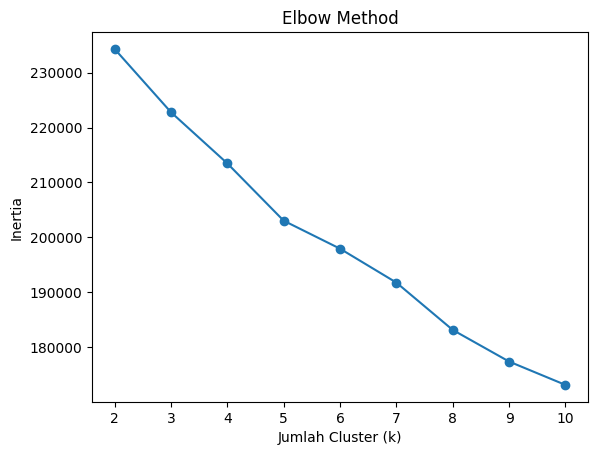

In [35]:
# Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.418
K=3, Silhouette Score=0.399
K=4, Silhouette Score=0.105
K=5, Silhouette Score=0.105
K=6, Silhouette Score=0.050
